In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

os.environ["NEURITE_BACKEND"] = "pytorch"

pd.set_option('display.max_colwidth', None)

/tmp/ipykernel_3238904/4053674475.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
datasets = ["ACDC", "PanDental", "SCD", \
            "STARE", "SpineWeb", "WBC", \
            "BTCV", "BUID", "HipXRay",\
            "TotalSegmentator", "COBRE", "SCR"]

In [3]:
from experiments.dataset.multisegment2d import MultiBinarySegment2D
dl = MultiBinarySegment2D(
    resolution=128, # options: 64, 128, 256
    allow_instance=False, # some datasets have instance labels, this merges them into semantic labels
    min_label_density=3e-3, # filters out examples where the label is empty
    preload=False,
    samples_per_epoch=1000,
    support_size=4,
    target_size=1,
    sampling='hierarchical',
    slicing=['midslice', 'maxslice'], # For 3D datasets, we extracted the midslices and the maxslices along each axis 
    split='train',
    context_split='train', 
    datasets=datasets, # if you set to None, it will use all available datasets but that takes a long time the first time you initialize it
)

In [4]:
import experiments.utils.paths
import neurite as ne

In [5]:
dl.init()

No updates to index
Filtered task_df: 1248
got task df: 1248


/data/ddmg/mvseg-ordering/experiments/dataset/multisegment2d.py:156: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["label_type"].fillna("soft", inplace=True)


target_datasets: 1248


In [6]:
import sys
from pathlib import Path

# Make sure the repo is on sys.path (adjust if your notebook starts elsewhere)
repo_root = Path("/data/ddmg/mvseg-ordering")
if str(repo_root) not in sys.path:
    sys.path.append(str(repo_root))

from experiments.dataset.mega_medical_dataset import DATASETS
from experiments.dataset.multisegment2d import MultiBinarySegment2D

# Build the loader exactly as the launcher does
dl = MultiBinarySegment2D(
    resolution=128,
    allow_instance=False,
    min_label_density=3e-3,
    preload=False,
    samples_per_epoch=1000,
    support_size=4,
    target_size=1,
    sampling="hierarchical",
    slicing=["midslice", "maxslice"],
    split="train",
    context_split="same",
    datasets=DATASETS,
)
dl.init()

task_df = dl.task_df.copy()
dataset_name = "TotalSegmentator"          # change to any dataset you want to inspect

subset = task_df[task_df["task"].str.startswith(f"{dataset_name}/")]

print(f"{len(subset)} tasks found for {dataset_name!r}")
display(subset[["task", "label", "slicing"]].head())  # show a few rows
print("Indices:", subset.index.tolist(), len(subset.index.tolist()))


No updates to index
Filtered task_df: 1248
got task df: 1248


/data/ddmg/mvseg-ordering/experiments/dataset/multisegment2d.py:156: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["label_type"].fillna("soft", inplace=True)


target_datasets: 1248
538 tasks found for 'TotalSegmentator'


,task,label,slicing
864,TotalSegmentator/retrieved_2022-09-01/CT/0,0,maxslice
865,TotalSegmentator/retrieved_2022-09-01/CT/0,1,maxslice
874,TotalSegmentator/retrieved_2022-09-01/CT/0,10,maxslice
964,TotalSegmentator/retrieved_2022-09-01/CT/0,100,maxslice
965,TotalSegmentator/retrieved_2022-09-01/CT/0,101,maxslice


Indices: [864, 865, 874, 964, 965, 966, 967, 875, 876, 877, 878, 879, 880, 881, 882, 883, 866, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 867, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 868, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 869, 916, 917, 918, 919, 920, 921, 922, 923, 870, 924, 925, 928, 929, 930, 931, 932, 933, 871, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 872, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 873, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 656, 657, 666, 756, 757, 758, 759, 667, 668, 669, 670, 671, 672, 673, 674, 675, 658, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 659, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 660, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 661, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 662, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 663, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 664, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 665, 746, 747, 748, 749, 

In [7]:
dl.target_datasets

{624: BinarySegment2D(task='ACDC/Challenge2017/MRI/2', resolution=128, split='train', label=0, label_type='soft', slicing='maxslice', version='v4.2', min_label_density=0.003, background=False, allow_instance=False, preload=False, samples_per_epoch=None, generator=None, cutoff=None, seed=42),
 625: BinarySegment2D(task='ACDC/Challenge2017/MRI/2', resolution=128, split='train', label=1, label_type='soft', slicing='maxslice', version='v4.2', min_label_density=0.003, background=False, allow_instance=False, preload=False, samples_per_epoch=None, generator=None, cutoff=None, seed=42),
 626: BinarySegment2D(task='ACDC/Challenge2017/MRI/2', resolution=128, split='train', label=2, label_type='soft', slicing='maxslice', version='v4.2', min_label_density=0.003, background=False, allow_instance=False, preload=False, samples_per_epoch=None, generator=None, cutoff=None, seed=42),
 640: BinarySegment2D(task='BTCV/Cervix/CT/0', resolution=128, split='train', label=0, label_type='soft', slicing='maxsli

In [8]:
len(dl.target_datasets[21])

3

In [9]:
data = dl.target_datasets[20]
data

BinarySegment2D(task='BTCV/Cervix/CT/2', resolution=128, split='train', label=0, label_type='soft', slicing='midslice', version='v4.2', min_label_density=0.003, background=False, allow_instance=False, preload=False, samples_per_epoch=None, generator=None, cutoff=None, seed=42)

In [ ]:
dl = MultiBinarySegment2D(
        resolution=128,
        allow_instance=False,
        min_label_density=3e-3,
        preload=False,
        samples_per_epoch=1000,
        support_size=4,
        target_size=1,
        sampling="hierarchical",
        slicing=["midslice", "maxslice"],
        split='train',
        context_split="same",
        datasets=DATASETS,
    )
dl.init()
task_df = dl.task_df.copy()

dataset_name='TotalSegmentator'
filter_task=None
filter_label=None
filter_slicing='maxslice' 
filter_axis=2

subset = task_df
print("1",subset.empty)
if dataset_name:
    subset = subset[subset["task"].str.startswith(f"{dataset_name}/")]
    print("2",subset.empty)
if filter_task:
    subset = subset[subset["task"] == filter_task]
if filter_label is not None:
    subset = subset[subset["label"] == int(filter_label)]
if filter_slicing:
    
    subset = subset[subset["slicing"] == filter_slicing]
    print("3",subset.empty)
if filter_axis is not None and "axis" in subset.columns:
   
    subset = subset[subset["axis"] == "2"]
    print(subset)
print(subset.empty)

No updates to index
Filtered task_df: 1248
got task df: 1248


/data/ddmg/mvseg-ordering/experiments/dataset/multisegment2d.py:156: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["label_type"].fillna("soft", inplace=True)


target_datasets: 1248
1 False
2 False
3 False
Empty DataFrame
Columns: [digest, dataset, version, slicing, group, modality, axis, resolution, n_labels, n_train, n_val, n_test, n_total, label, label_type, task, dataset_group, dataset_group_modality, full_task]
Index: []
True


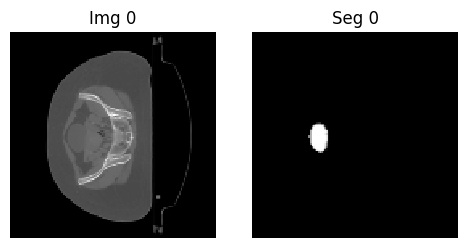

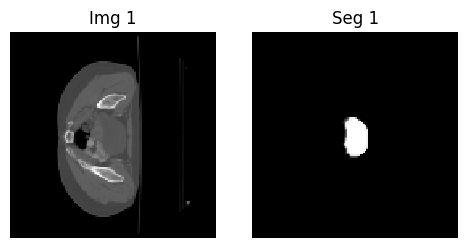

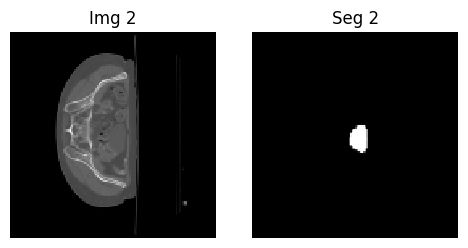

In [ ]:
for i in range(3):
    img,seg = data[i]
    ne.plot.slices([img, seg], titles=[f'Img {i}', f'Seg {i}'], grid=(1,2), width=5)

In [ ]:
from experiments.analysis.perm_best_worst_savings import analyze_ablation, _print_report
task_root = "experiments/scripts/random/experiment_wbc/WBC_JTSC_EM_0_label0_midslice_idx14/commit_pred_97"
per_perm, best, worst, savings = analyze_ablation(task_root)
_print_report(task_root, best, worst, savings)



Ablation: commit_pred_97
Analyzing subset_index=1
Best permutation (highest avg initial Dice): 13 (avg_init=0.847, avg_iters=14.60)
Worst permutation (lowest avg initial Dice): 48 (avg_init=0.760, avg_iters=14.30)
Overall average iteration savings (worst - best): -0.30 iters/image


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from experiments.analysis.perm_scatter_initial_vs_iters import _read_subset_support_summary

task_root = "experiments/scripts/random/experiment_wbc/WBC_JTSC_EM_0_label0_midslice_idx14/commit_pred_97"
df = _read_subset_support_summary(task_root)

# Aggregate by (subset_index, permutation_index)
grp = (
    df.groupby(["subset_index", "permutation_index"])
      .agg(avg_initial=("initial_dice", "mean"),
           avg_iters=("iterations_used", "mean"))
      .reset_index()
)

# Global OLS fit (keep Series so column has name)
X = sm.add_constant(grp["avg_initial"])
y = grp["avg_iters"]
model = sm.OLS(y, X).fit()

slope = model.params["avg_initial"]
ci_low, ci_high = model.conf_int().loc["avg_initial"]
r2 = model.rsquared
p_val = model.pvalues["avg_initial"]

print(f"Global slope = {slope:.3f} iters/Dice (≈ {slope*0.01:.3f} per +0.01 Dice)")
print(f"95% CI [{ci_low:.3f}, {ci_high:.3f}], R² = {r2:.3f}, p = {p_val:.3g}")

# Spearman correlation (rank-based)
rho = grp["avg_initial"].corr(grp["avg_iters"], method="spearman")
print(f"Spearman rho = {rho:.3f}")

# Within-subset (demean per subset)
grp["x_c"] = grp["avg_initial"] - grp.groupby("subset_index")["avg_initial"].transform("mean")
grp["y_c"] = grp["avg_iters"]  - grp.groupby("subset_index")["avg_iters"].transform("mean")
Xc = sm.add_constant(grp["x_c"])
yc = grp["y_c"]
model_c = sm.OLS(yc, Xc).fit()
print(f"Within-subset slope = {model_c.params['x_c']:.3f}, R² = {model_c.rsquared:.3f}, "
      f"p = {model_c.pvalues['x_c']:.3g}")

# Cap sensitivity: drop subset/permutation cells with >=20% capped images
if "prompt_limit" in df.columns:
    flags = (
        df.assign(hit_cap=df["iterations_used"] >= df["prompt_limit"])
          .groupby(["subset_index","permutation_index"])["hit_cap"]
          .mean()
          .reset_index()
    )
    grp_f = grp.merge(flags, on=["subset_index","permutation_index"])
    keep = grp_f[grp_f["hit_cap"] < 0.2]
    print("GIANNA")
    if len(keep) >= 5:
        Xf = sm.add_constant(keep["avg_initial"])
        yf = keep["avg_iters"]
        model_f = sm.OLS(yf, Xf).fit()
        print(f"Filtered (cap<20%, n={len(keep)}): slope = {model_f.params['avg_initial']:.3f}, "
              f"R² = {model_f.rsquared:.3f}, p = {model_f.pvalues['avg_initial']:.3g}")

# Practical effect examples
for delta in [0.01, 0.03, 0.05]:
    print(f"ΔDice = {delta:.02f} → expected iteration change ≈ {-slope * delta:.2f}")

Global slope = -18.431 iters/Dice (≈ -0.184 per +0.01 Dice)
95% CI [-21.501, -15.361], R² = 0.122, p = 4.31e-30
Spearman rho = -0.384
Within-subset slope = -5.214, R² = 0.013, p = 0.000343
ΔDice = 0.01 → expected iteration change ≈ 0.18
ΔDice = 0.03 → expected iteration change ≈ 0.55
ΔDice = 0.05 → expected iteration change ≈ 0.92
